# EMA Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [2]:
ticker="MSFT"
start_date="2020-01-01"
end_date="2025-05-13"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,153.323288,153.428291,151.137325,151.566880,22622100
2020-01-03,151.414108,152.683690,150.879551,151.127749,21116200
2020-01-06,151.805481,151.872308,149.399957,149.944070,20813700
2020-01-07,150.421371,152.416422,150.173188,152.082331,21634100
2020-01-08,152.817322,153.495074,150.774540,151.710016,27746500


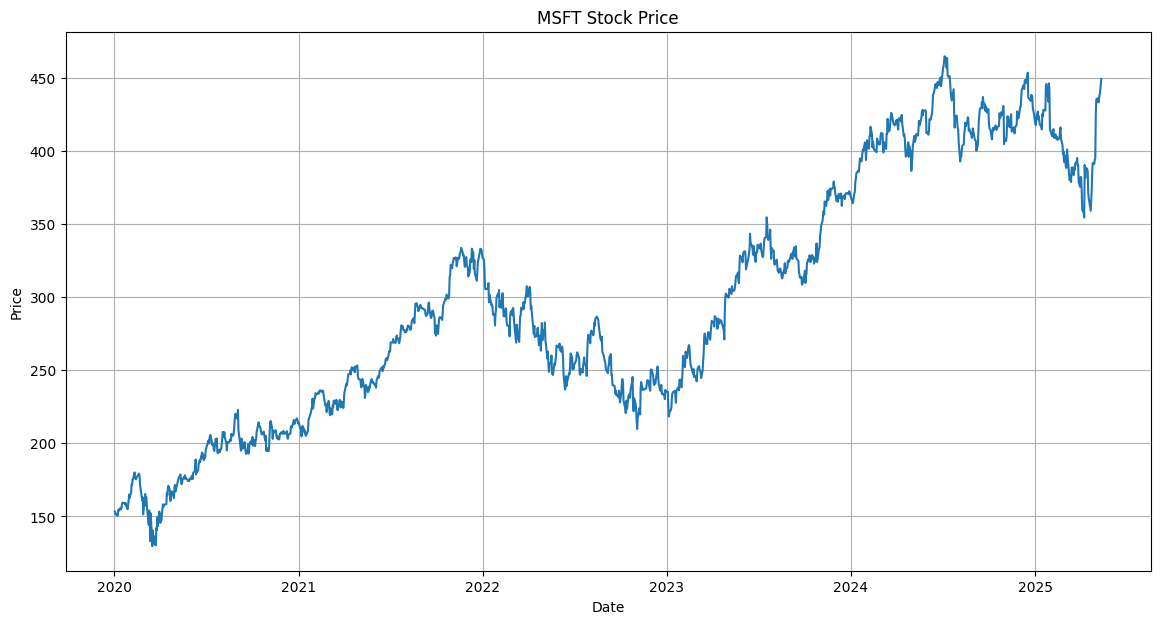

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## EMA (Exponential Moving Average)
- EMA คือค่าเฉลี่ยเคลื่อนที่ประเภทหนึ่งที่ให้น้ำหนักกับราคาล่าสุดมากกว่าราคาในอดีต ทำให้ EMA ตอบสนองต่อการเปลี่ยนแปลงของราคาได้เร็วกว่า SMA (Simple Moving Average) EMA มักถูกนำมาใช้ในการวิเคราะห์ทางเทคนิคเพื่อระบุแนวโน้มและสัญญาณการซื้อขาย

### วิธีการคำนวณ EMA:
1. คำนวณค่าคงที่ (Smoothing Factor): ค่าคงที่นี้จะกำหนดว่าราคาล่าสุดจะมีผลต่อค่า EMA มากน้อยแค่ไหน โดยมีสูตรดังนี้:
- ค่าคงที่ (α) = 2 / (จำนวนวัน + 1)
- ตัวอย่าง: หากต้องการคำนวณ EMA 10 วัน ค่าคงที่ = 2 / (10 + 1) = 0.1818
2. คำนวณ EMA ของวันแรก: ในวันแรกที่เริ่มคำนวณ EMA จะไม่มีค่า EMA ของวันก่อนหน้า ดังนั้นเราจะใช้ SMA เป็นค่าเริ่มต้น:
- EMA (วันแรก) = SMA (จำนวนวัน)
- ตัวอย่าง: หากต้องการคำนวณ EMA 10 วัน EMA (วันแรก) = SMA 10 วัน
3. คำนวณ EMA ของวันถัดไป: หลังจากได้ค่า EMA ของวันแรกแล้ว เราสามารถคำนวณ EMA ของวันถัดไปได้โดยใช้สูตร:
- EMA (วันนี้) = (ราคาปิดวันนี้ × ค่าคงที่) + (EMA (เมื่อวาน) × (1 - ค่าคงที่))
- ตัวอย่าง: หากราคาปิดวันนี้คือ 120 บาท และ EMA ของเมื่อวานคือ 115 บาท EMA (วันนี้) = (120 × 0.1818) + (115 × (1 - 0.1818)) = 115.91 บาท
### การนำ EMA ไปใช้งาน:

- ระบุแนวโน้มของราคา
- หาระดับแนวรับแนวต้าน
- ใช้เป็นสัญญาณซื้อขาย (เช่น เมื่อราคาตัดขึ้นเหนือ EMA จะเป็นสัญญาณซื้อ และเมื่อราคาตัดลงต่ำกว่า EMA จะเป็นสัญญาณขาย)

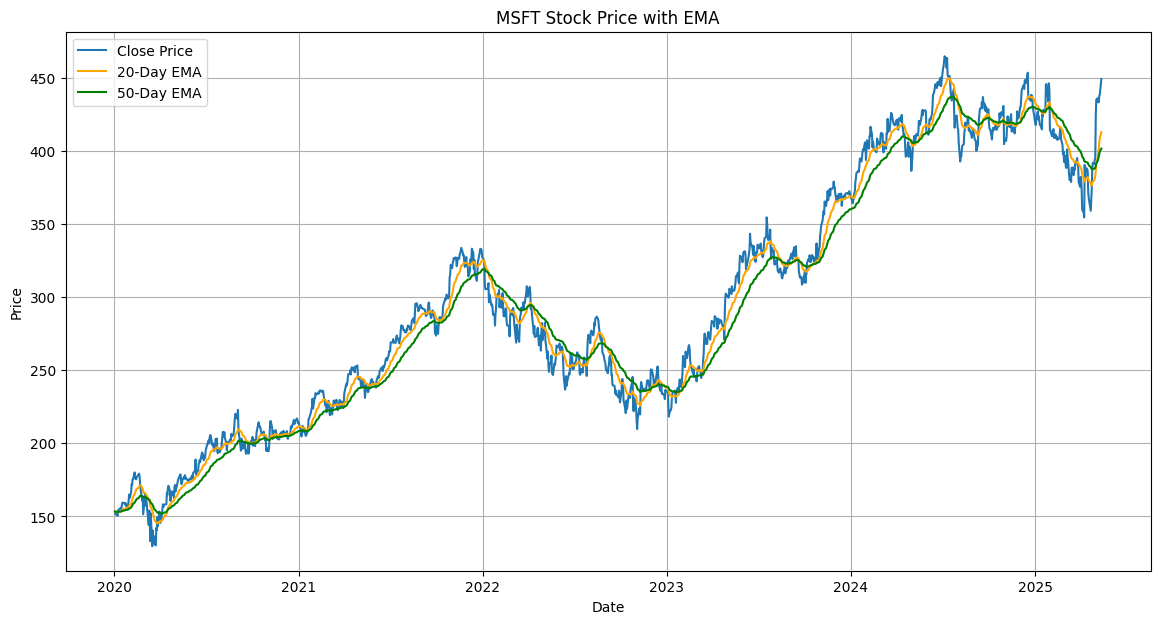

In [5]:
#Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_20'], label='20-Day EMA', color='orange')
plt.plot(data['EMA_50'], label='50-Day EMA', color='green')
plt.title(f'{ticker} Stock Price with EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


### วิธีการดูกราฟ:

1. ดูแนวโน้ม:
- แนวโน้มขึ้น: หากเส้นราคา (สีฟ้า) และเส้น EMA ทั้งสองเส้นมีทิศทางสูงขึ้น แสดงว่าหุ้นมีแนวโน้มเป็นขาขึ้น
- แนวโน้มลง: หากเส้นราคาและเส้น EMA ทั้งสองเส้นมีทิศทางลดลง แสดงว่าหุ้นมีแนวโน้มเป็นขาลง
- แนวโน้ม Sideways: หากเส้นราคามีการเคลื่อนไหวในกรอบแคบ ๆ และเส้น EMA ไม่ได้มีทิศทางที่ชัดเจน แสดงว่าหุ้นอยู่ในช่วง Sideways หรือไม่มีแนวโน้มที่ชัดเจน
2. ดูการตัดกันของเส้น EMA:
- Golden Cross: เมื่อเส้น 20-Day EMA (สีส้ม) ตัดขึ้นเหนือเส้น 50-Day EMA (สีเขียว) มักเป็นสัญญาณซื้อ ซึ่งบ่งบอกว่าแนวโน้มระยะสั้นเริ่มแข็งแกร่งกว่าแนวโน้มระยะกลาง
- Death Cross: เมื่อเส้น 20-Day EMA ตัดลงต่ำกว่าเส้น 50-Day EMA มักเป็นสัญญาณขาย ซึ่งบ่งบอกว่าแนวโน้มระยะสั้นเริ่มอ่อนแอกว่าแนวโน้มระยะกลาง
3. ดูการเคลื่อนไหวของราคาเทียบกับเส้น EMA:
- แนวรับ: เมื่อราคาลดลงมาใกล้เส้น EMA (โดยเฉพาะเส้น 50-Day EMA) เส้น EMA อาจทำหน้าที่เป็นแนวรับ ซึ่งราคาอาจจะเด้งขึ้นเมื่อมาสัมผัสเส้น EMA
- แนวต้าน: เมื่อราคาสูงขึ้นไปใกล้เส้น EMA เส้น EMA อาจทำหน้าที่เป็นแนวต้าน ซึ่งราคาอาจจะปรับตัวลงเมื่อขึ้นไปสัมผัสเส้น EMA
4. ความไวต่อการเปลี่ยนแปลง: เนื่องจาก EMA - ให้น้ำหนักกับราคาล่าสุดมากกว่า SMA ดังนั้นเส้น EMA จะตอบสนองต่อการเปลี่ยนแปลงของราคาได้เร็วกว่าเส้น SMA